In [76]:
import pandas as pd
import numpy as np

In [77]:
df = pd.read_csv("Samplesuperstore.csv")

In [78]:
print(df.shape)

(9994, 13)


In [79]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [81]:
print(df.columns)

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [82]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [83]:
df.duplicated().sum()

np.int64(17)

In [84]:
df = df.drop_duplicates()

In [85]:
df.duplicated().sum()

np.int64(0)

In [86]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [87]:
df['Profit Margin'] = df['Profit'] / df['Sales']

In [88]:
df['Discount Flag'] = np.where(df['Discount'] > 0, 'Yes', 'No')

In [89]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin,Discount Flag
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.1600,No
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.3000,No
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.4700,No
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.4000,Yes
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.1125,Yes


In [90]:
df.to_csv("cleaned_superstore_sales.csv", index=False)

In [91]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales

Category
Technology         836154.0330
Furniture          741306.3133
Office Supplies    718735.2440
Name: Sales, dtype: float64

In [92]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
region_profit

Region
West       108329.8079
East        91506.3092
South       46749.4303
Central     39655.8752
Name: Profit, dtype: float64

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

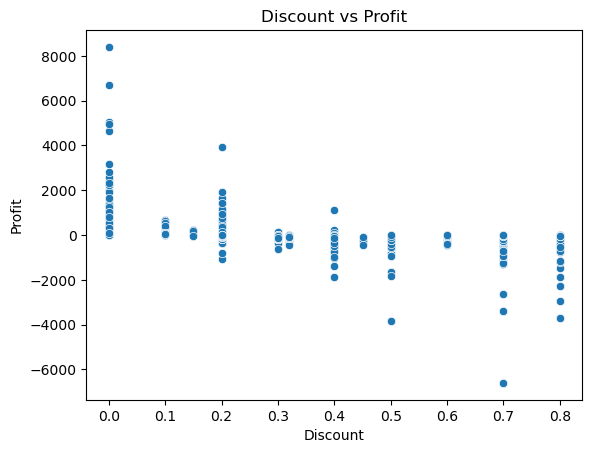

In [94]:
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Discount vs Profit")
plt.show()

In [95]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_profit_margin = df['Profit Margin'].mean()

total_sales, total_profit, avg_profit_margin

(np.float64(2296195.5903),
 np.float64(286241.4226),
 np.float64(0.1201135382153931))

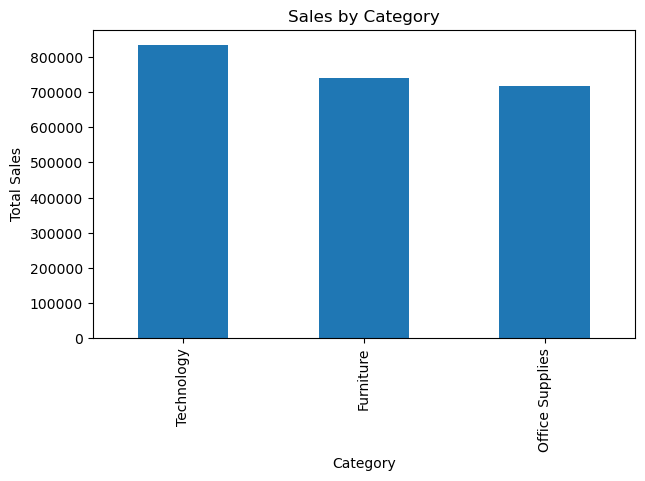

In [96]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

category_sales.plot(kind='bar', figsize=(7,4))
plt.title("Sales by Category")
plt.ylabel("Total Sales")
plt.show()

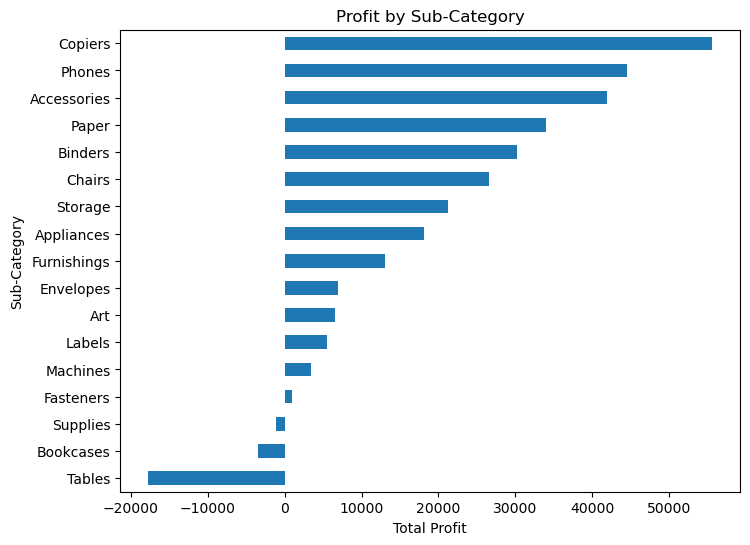

In [97]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()

subcat_profit.plot(kind='barh', figsize=(8,6))
plt.title("Profit by Sub-Category")
plt.xlabel("Total Profit")
plt.show()


In [98]:
region_sales = df.groupby('Region')['Sales'].sum()
region_profit = df.groupby('Region')['Profit'].sum()

region_sales, region_profit


(Region
 Central    500782.8528
 East       678435.1960
 South      391721.9050
 West       725255.6365
 Name: Sales, dtype: float64,
 Region
 Central     39655.8752
 East        91506.3092
 South       46749.4303
 West       108329.8079
 Name: Profit, dtype: float64)

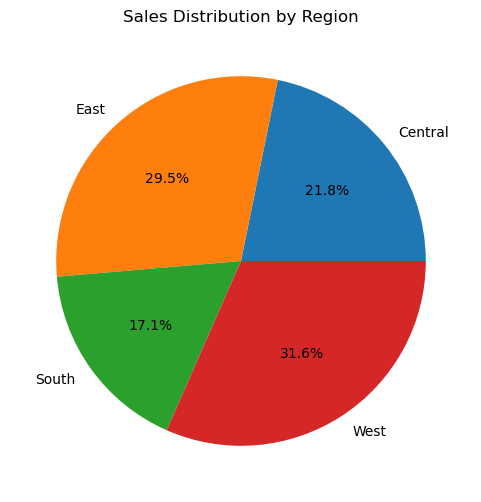

In [99]:
region_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Sales Distribution by Region")
plt.ylabel("")
plt.show()

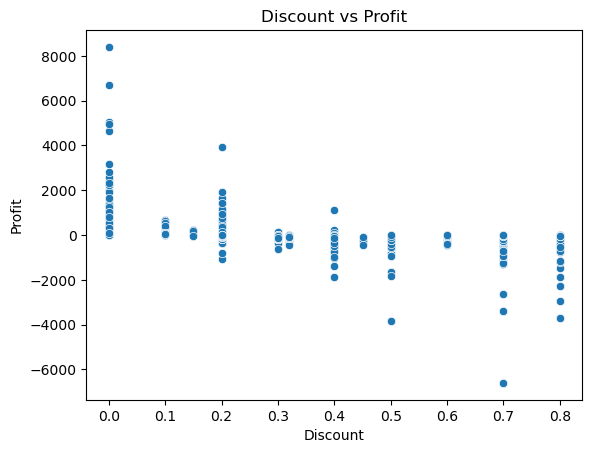

In [100]:
import seaborn as sns

sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Discount vs Profit")
plt.show()


In [101]:
segment_sales = df.groupby('Segment')['Sales'].sum()
segment_profit = df.groupby('Segment')['Profit'].sum()

segment_sales, segment_profit


(Segment
 Consumer       1.160833e+06
 Corporate      7.060701e+05
 Home Office    4.292927e+05
 Name: Sales, dtype: float64,
 Segment
 Consumer       134007.4413
 Corporate       91954.9798
 Home Office     60279.0015
 Name: Profit, dtype: float64)

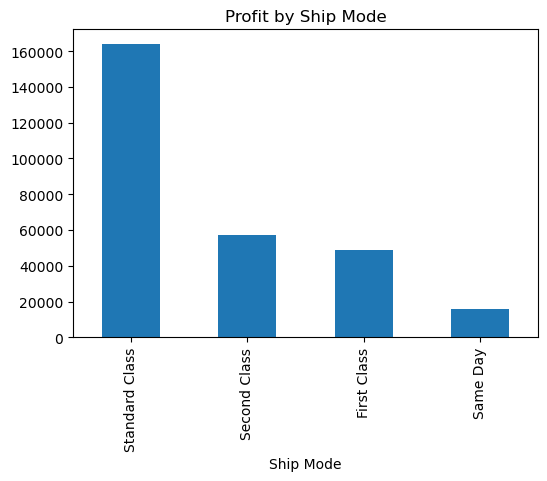

In [102]:
shipmode_profit = df.groupby('Ship Mode')['Profit'].sum().sort_values(ascending=False)

shipmode_profit.plot(kind='bar', figsize=(6,4))
plt.title("Profit by Ship Mode")
plt.show()


In [103]:
target = "Sales"

In [104]:
data = df[features + [target]].copy()

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X = data[features]
y = data[target]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [109]:
num_cols = ["Quantity", "Discount"]
cat_cols = ["Ship Mode", "Segment", "Region", "Category", "Sub-Category"]

In [110]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
baseline_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

baseline_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Quantity', 'Discount']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Ship Mode', 'Segment',
                                                   'Region', 'Category',
                                                   'Sub-Category'])])),
                ('model', LinearRegression())])

In [113]:
from sklearn.metrics import r2_score, mean_squared_error

In [114]:
y_pred = baseline_model.predict(X_test)

In [115]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [116]:
print("baseline R2 Score:", r2)
print("baseline RMSE:", rmse)

baseline R2 Score: 0.30252535214978915
baseline RMSE: 500.4161758916953


In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
rf_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(random_state=42))
])

In [119]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Quantity', 'Discount']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Ship Mode', 'Segment',
                                                   'Region', 'Category',
                                                   'Sub-Category'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [120]:
y_pred_rf = rf_model.predict(X_test)

In [121]:
print("RF R2:", r2_score(y_test, y_pred_rf))
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RF R2: 0.11969928856780188
RF RMSE: 500.4161758916953


In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
}

In [124]:
rf_tuned = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(random_state=42))
])

In [125]:
grid = GridSearchCV(
    rf_tuned,
    param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

In [126]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['Quantity',
                                                                          'Discount']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Ship '
                                                                          'Mode',
                                                                          'Segment',
                                                                          'Region',
                                                                          'Category',
                                                                          'Sub-Category'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error')

In [127]:
print("Best Params:", grid.best_params_)

Best Params: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}


In [128]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

In [129]:
print("Tuned RF R2:", r2_score(y_test, y_pred_best))
print("Tuned RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Tuned RF R2: 0.28674749861260795
Tuned RF RMSE: 500.4161758916953


In [130]:
best_rf = best_model.named_steps["model"]

In [131]:
ohe = best_model.named_steps["preprocess"].named_transformers_["cat"]

In [132]:
cat_feature_names = ohe.get_feature_names_out(cat_cols)

In [133]:
feature_names = num_cols + list(cat_feature_names)

In [134]:
importances = best_rf.feature_importances_

In [135]:
fi = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(15)

In [136]:
fi

Quantity                    0.257716
Sub-Category_Copiers        0.110915
Region_South                0.089995
Discount                    0.089126
Sub-Category_Machines       0.089015
Region_Central              0.060313
Category_Office Supplies    0.048178
Sub-Category_Furnishings    0.037169
Ship Mode_Second Class      0.028608
Segment_Home Office         0.026743
Region_East                 0.024789
Segment_Consumer            0.020585
Segment_Corporate           0.016187
Category_Furniture          0.013668
Region_West                 0.012322
dtype: float64

In [137]:
import os
os.makedirs("models", exist_ok=True)

In [138]:
import joblib
joblib.dump(best_model, "models/sales_prediction_model.pkl")

['models/sales_prediction_model.pkl']